Anshu Vishwakarma
B.Tech VII sem
Roll No. 0873CS211016
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training with Adagrad optimizer...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training with RMSprop optimizer...
Training with Adam optimizer...


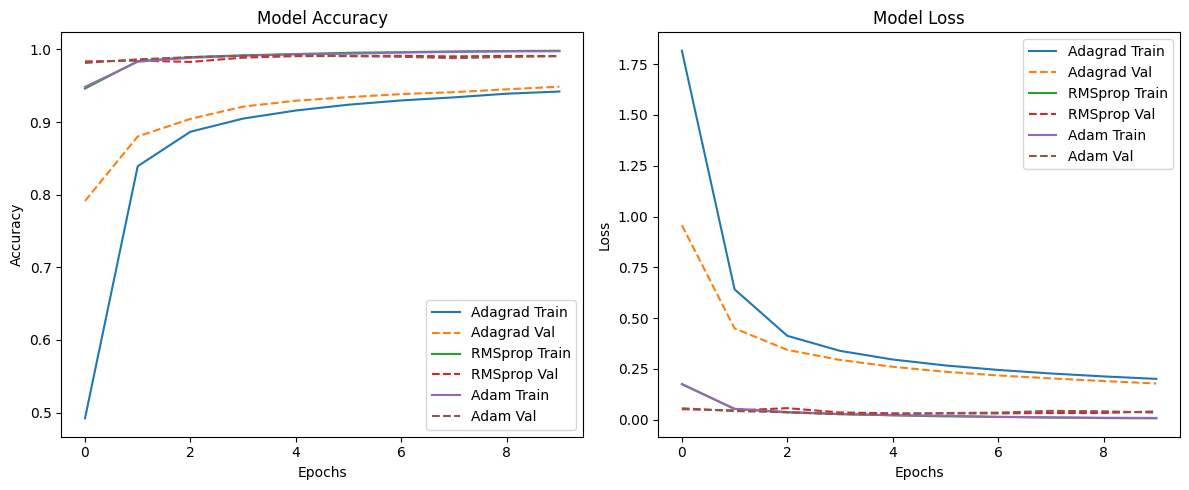

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

print("Anshu Vishwakarma")
print("B.Tech VII sem")
print("Roll No. 0873CS211016")

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0  # Normalize to [0, 1]
x_test = x_test.astype('float32') / 255.0
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # Reshape for Conv2D
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

# One-hot encode labels
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

def create_model():
    model = keras.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

def train_and_evaluate(optimizer):
    model = create_model()
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test), verbose=0)
    return history

optimizers = ['Adagrad', 'RMSprop', 'Adam']
histories = {}

for opt in optimizers:
    print(f'Training with {opt} optimizer...')
    history = train_and_evaluate(opt)
    histories[opt] = history


plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
for opt in optimizers:
    plt.plot(histories[opt].history['accuracy'], label=f'{opt} Train')
    plt.plot(histories[opt].history['val_accuracy'], label=f'{opt} Val', linestyle='--')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
for opt in optimizers:
    plt.plot(histories[opt].history['loss'], label=f'{opt} Train')
    plt.plot(histories[opt].history['val_loss'], label=f'{opt} Val', linestyle='--')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()